In [1]:
#### Reference paper https://arxiv.org/abs/1808.08219

#### Keeping tau_i fixed and then calculating y_i as per the value of 
#### tau_i.


import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
from adaptive_integrator import integrate
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})


# Reference paper https://arxiv.org/abs/1808.08219
# Referencing from Eq.(3.2) to Eq.(3.7) in https://arxiv.org/abs/1808.08219
# Only using the dimensionless equations
# Using PBH as the sole source og Gravitational potential
# Explicitly adding Hubble expansion (or deceleration term) in RD with H(t)=1/2t
# Using either solve_ivp or adaptive integrator as the differential equation solver




 
def j_fdm(t, y):
    r, dydtau = y
    dydtau2 = (2*gamma - (gamma**2))/(4*(r**3)) - 1/(r**2) - r/(4 * (t**2))
    return [dydtau, dydtau2]


def j_cdm(t, y):
    r, dydtau = y
    dydtau2 =  - 1/(r**2) - r/(4 * (t**2))
    return [dydtau, dydtau2]



# Specifying initial conditions as per Fig.1 of https://arxiv.org/abs/1808.08219
gamma = 1e-10
delta_i = 1e-5
y_i = 1e-5
tau_i = ((2 / 9) * (1 + delta_i) * (y_i ** 3)) ** (1 / 2)
v_i = (3 * (1 / (1 + delta_i)) * (tau_i)) / (y_i ** 2)

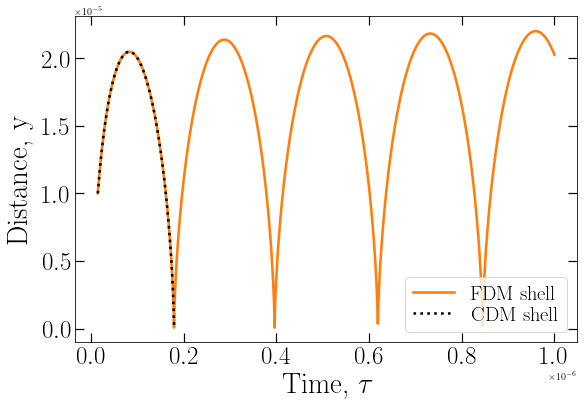

In [6]:
tau_f = 1e-6



y0 = [y_i, v_i]
tau_arr = np.geomspace(tau_i, tau_f, 10000)
sol_fdm = solve_ivp(j_fdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45', rtol=1e-8, atol=1e-10)
sol_cdm = solve_ivp(j_cdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45', rtol=1e-8, atol=1e-10)


#t_arr_adaptive, y_arr_adaptive, _ = integrate(d2ydtau2, y_i, v_i, tau_i, tau_f, eta=1e-8, dt_max=1e-2)


fig, ax = plt.subplots(1, figsize=(9, 6))
plt.rc('lines', linewidth = 2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')


plt.plot(sol_fdm.t, sol_fdm.y[0],  color = 'C1')
plt.plot(sol_cdm.t, sol_cdm.y[0],  color = 'k', ls = ':')
#plt.plot(t_arr_adaptive, y_arr_adaptive, label="",  color ='C2', ls = ':')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel(r'Time, $\tau $', fontsize = 29)
plt.ylabel('Distance, y ', fontsize = 29, labelpad = 9)

plt.legend( ["FDM shell",'CDM shell'], prop = {'size':20.5},
              loc='lower right', shadow = False,  labelspacing = 0.13,  title_fontsize =19,
           facecolor = 'white')


#plt.xlim(1e-8, 1e-5)
#plt.ylim(1e-8, 1e-4)
plt.savefig('Diff_shells.pdf', bbox_inches = 'tight')
plt.show()